# Analytic of Facebook Followers

## 1.0 Data clean up

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/Dr Diban/Downloads/temp_datalab_records_social_facebook/temp_datalab_records_social_facebook.csv')

c:\users\dr diban\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
import re
import requests
import urllib.request as urllib2

In [38]:
times=pd.to_datetime(df['time'],format='%Y-%m-%d')
df['time']=times


In [4]:
url = 'https://www.fsdbco.com/top-250-restaurant-chains-us-2019/'
html = requests.get(url).content
df_list = pd.read_html(html)
df_t = df_list[-1]
print(df_t[1])

0                               Chain
1                          McDonald’s
2                           Starbucks
3                              Subway
4                           Taco Bell
                    ...              
246                       Metro Diner
247           Freebirds World Burrito
248                 Togo’s Sandwiches
249    Costa Vida Fresh Mexican Grill
250             L&L Hawaiian Barbecue
Name: 1, Length: 251, dtype: object


In [7]:
Group_sort_all=(df.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [59]:
df_t['names'] = df_t[1].apply(lambda x: re.sub('[ ’]','',x).lower())

In [61]:
##Finding username in Top 250 F&B names
user=Group_sort_all[['username']].head(1).apply(lambda x: x.str.lower()).values
names=df_t['names'].values[1::]
top_250_user=len(names)
user=[re.sub("us$","", str(elem[0])) for elem in user]
total_user=len(Group_sort_all[['username']].head(1))
filt_user=[]
for i in range(total_user):
    for j in range(top_250_user):
        if re.match(user[i]+'[a-z]*',names[j]):
            filt_user.append(True)
            break
        if not re.match(user[i]+'[a-z]*',names[j]) and j==(top_250_user-1):
            filt_user.append(False) 


In [62]:
nn=[]
for i in range(len(user)):
    if user[i]=='nan':
        nn.append(i)

In [63]:
nan_fb_id=[]
for i in range(len(nn)):
    nan_fb_id.append(df['facebook_id'].loc[Group_sort_all[['username']].head(1).iloc[nn[i]].name])

In [64]:
##Facebook name for NaN_username
nan_fb_name=[]
for i in range (len(nan_fb_id)):
    r = requests.get("https://www.facebook.com/"+str(nan_fb_id[i]))
    page_source = r.text              
    nan_fb_name.append(re.findall(r'"pageTitle">[a-zA-z &]+', page_source))

In [24]:
nan_fb_name[2]=["40|86 Advisors"]

In [25]:
nan_fb_name

[['"pageTitle">Countryplace Mortgage '],
 ['"pageTitle">Parrot'],
 ['40|86 Advisors'],
 ['"pageTitle">Progressive Waste Solutions '],
 ['"pageTitle">Armstrong Aerospace '],
 ['"pageTitle">Astronics AES '],
 ['"pageTitle">eSecurityPlanet'],
 ['"pageTitle">Ballard Power Systems '],
 ['"pageTitle">Siskiyou Daily News '],
 ['"pageTitle">Endo International plc '],
 ['"pageTitle">North Attleborough Free Press '],
 ['"pageTitle">Facebook'],
 ['"pageTitle">Plumas Bank '],
 ['"pageTitle">Facebook'],
 ['"pageTitle">Facebook'],
 ['"pageTitle">Facebook'],
 ['"pageTitle">Astec'],
 ['"pageTitle">BTX Harvard Apparatus '],
 ['"pageTitle">ParkerVision'],
 ['"pageTitle">Federal Signal EMComm '],
 ['"pageTitle">Lake Shore Savings Bank '],
 ['"pageTitle">Facebook'],
 ['"pageTitle">Southwest Daily News '],
 ['"pageTitle">Douglas Emmett Properties '],
 ['"pageTitle">Sparton '],
 ['"pageTitle">Best Distributing '],
 ['"pageTitle">MotherWord '],
 ['"pageTitle">Facebook'],
 ['"pageTitle">General Dynamics Bath 

In [26]:
##Refining NaN_username Facebook name 
filt_nan_fb_name=[]
for i in range(len(nan_fb_name)):
    filt_nan_fb_name.append(re.sub(" ","",nan_fb_name[i][0].split('>')[-1]).lower())

In [65]:
##Finding NaN_username in Top 250 F&B names
total_user=len(filt_nan_fb_name)
nan_filt_user=[]
for i in range(total_user):
    for j in range(top_250_user):
        if re.match(filt_nan_fb_name[i]+'[a-z]*',names[j]):
            nan_filt_user.append(True)
            break
        if not re.match(filt_nan_fb_name[i]+'[a-z]*',names[j]) and j==(top_250_user-1):
            nan_filt_user.append(False) 

array([['TorchlightEnergy'],
       ['financialengines'],
       ['johnsonsbaby'],
       ['advanceautoparts'],
       ['arrowheadmills'],
       ['proximitylondon'],
       ['caleresinc'],
       ['mindcti'],
       ['guidewiresoftware'],
       ['JustCloudStorage']], dtype=object)

In [189]:
##Food and beverage facebook names
user_unedit=Group_sort_all[['username']].head(1).values
fnb=[]
for i in range(len(user_unedit)):
    if filt_user[i]==True:
        fnb.append(user_unedit[i][0])  
del fnb[12]
del fnb[8]

In [70]:
##Food and beverage facebook index
index=[]
for i in range(len(user)):
    if filt_user[i]==True:
        index.append(i)

In [71]:
##Delete EA
del index[12]
del fnb[12]

In [72]:
##Delete Delta
del index[8]
del fnb[8]

In [88]:
fnb_id=[]
for i in range(len(index)):
    fnb_id.append(df['facebook_id'].iloc[Group_sort_all[['username']].head(1).iloc[index[i]].name])

In [91]:
df_fnb=df[df['facebook_id'].isin(fnb_id)]

## 2.0 Volatility Examination

Top 5 most liked page in the dataset for food & beverage (USA) category based on the lastest date

In [93]:
Group_sort=(df_fnb.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [94]:
Group_sort[['username','likes']].head(1).sort_values(by='likes',ascending=False)[0:5]

,username,likes
3620845,McDonalds,78045025
3617029,McDonaldsUS,78015575
3618844,KFC,51635735
3617334,Starbucks,37189939
3620760,PizzaHut,31513432


Bottom 5 least liked page in Facebook for food & beverage category based on the lastest date

In [95]:
Bot_5=Group_sort[['username','likes']].head(1).sort_values(by='likes',ascending=False)[-5:-1]
Bot_5

,username,likes
3620091,PolloTropical,176449
3618357,flemings,122103
3620512,GrandLuxCafe,81442
3620846,EddieVsPrimeSeafood,74770


Mean, median and standard deviation of Facebook food & beverage category likes based on the lastest date

In [96]:
Group_sort[['username','likes']].head(1).agg(['median','mean','std'])

,likes
median,1.347616e+06
mean,7.963902e+06
std,1.768098e+07


The volatility of 'talking about count' is examined

In [97]:
x=Group_sort['talking_about_count'].agg(['median','mean','std'])
data=x.sort_values(by='std',ascending=False)[0:5]


In [105]:
pagename_vol=[]
for i in (data.index):
    pagename_vol.append((Group_likes.get_group(i)['username'].head(1)).values[0])
data.insert(0,'FB name',pagename_vol)

In [106]:
data

,FB name,median,mean,std
facebook_id,,,,
22092443056,Starbucks,217623.0,286628.592000,227072.879456
134615383218473,burgerking,67275.0,108324.373957,120442.421331
18595834696,tacobell,43843.5,72152.128289,86549.091635
124149619252,chipotle,24370.0,41798.062023,58720.029172
6657899956,Dominos,67351.0,74853.076263,43243.994126


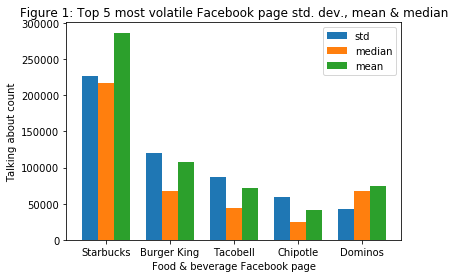

In [107]:
import numpy as np
import matplotlib.pyplot as plt
ypos=np.arange(len(data['mean']))
bar_with=0.25
fig,ax=plt.subplots()
bar_std=ax.bar(ypos-0.25,data['std'],bar_with,label='std')
bar_median=ax.bar(ypos,data['median'],bar_with,label='median')
bar_mean=ax.bar(ypos+0.25,data['mean'],bar_with,label='mean')
username=['Starbucks', 'Burger King', 'Tacobell', 'Chipotle', 'Dominos']
ax.set_xticks(ypos)
ax.set_xticklabels(username)
plt.ylabel('Talking about count')
plt.xlabel('Food & beverage Facebook page')
ax.legend()
plt.title('Figure 1: Top 5 most volatile Facebook page std. dev., mean & median')
plt.show()

ManUtd pages is examined in more detail. The page is filter based on talking_about_count that is 2 standard deviation from mean value


## 2.0 Facebook likes examination

In [99]:
df2=df_fnb

A new column repsenting normalised value for Facebook page likes are created  

In [100]:
likes_mean=df2['likes'].mean()
likes_std=df2['likes'].std()

In [101]:
data2=(df2['likes']-likes_mean)/likes_std
data2=data2-min(data2)

In [103]:
df2.loc[:,('Normalised likes')]=data2

In [108]:
df2

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin,Normalised likes
231,52693,2015-01-01 05:00:00+00:00,crackerbarrel,110688,f,5679526,2370971,59703,175123745870734,NaN,2017-02-14 02:02:47.053965+00,NaN,NaN,NaN,0.153215
233,52882,2015-01-01 05:00:00+00:00,jackinthebox,3,f,1559101,1067122,27118,46895347303,NaN,2017-02-14 02:49:11.420663+00,NaN,NaN,NaN,0.068032
236,52759,2015-01-01 05:00:00+00:00,dennys,61952,f,3769077,894027,11116,55330643140,NaN,2017-02-14 02:16:38.883023+00,NaN,NaN,NaN,0.056723
268,53137,2015-01-01 05:00:00+00:00,texasroadhouse,7,f,7525397,2674899,6156,8966519227,NaN,2017-02-14 03:46:14.151102+00,NaN,NaN,NaN,0.173071
336,53551,2015-01-01 05:00:00+00:00,burgerking,0,f,277389,7536694,154945,134615383218473,NaN,2017-02-14 07:19:04.519018+00,NaN,NaN,NaN,0.490700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620760,64360,2018-07-17 04:00:00+00:00,PizzaHut,3,f,6391320,31513432,2645,321935321302049,2018-07-18 05:49:36.242969+00,2018-07-18 05:49:36.243012+00,NaN,NaN,NaN,2.057141
3620845,63329,2018-07-17 04:00:00+00:00,McDonalds,0,f,31950665,78045025,5497,10150097174480584,2018-07-18 05:47:04.734795+00,2018-07-18 05:47:04.734838+00,NaN,NaN,NaN,5.097129
3620846,60854,2018-07-17 04:00:00+00:00,EddieVsPrimeSeafood,45276,f,477153,74770,1528,120283141419641,2018-07-17 05:30:02.262788+00,2018-07-17 05:30:02.262833+00,NaN,NaN,NaN,0.003200
3620946,891251,2018-07-17 04:00:00+00:00,jet,2177,f,0,369332,4357,256154354583303,2018-07-18 05:49:27.68657+00,2018-07-18 05:49:27.686613+00,NaN,NaN,NaN,0.022444


First, the absolute **likes** gained between the oldest and latest date for each Facebook pages are calculated.

In [109]:
Group_likes=(df2.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [110]:
top10=(Group_likes[['likes']].first()-Group_likes[['likes']].last()).sort_values(by='likes',ascending=False).head(10)

In [111]:
pagename=[]
for i in (top10.index):
    pagename.append((Group_likes.get_group(i)['username'].head(1)).values[0])
    

In [112]:
pagename=['McD',
 'McDUS',
 'KFC',
 'Dom',
 'PHut',
 'PJ',
 'wendys',
 'Chi',
 'Starb',
 'BK']

In [113]:
top10.insert(0,'FB name',pagename)

In [114]:
top10

,FB name,likes
facebook_id,,
10150097174480584,McD,17256164
50245567013,McDUS,17226714
7144906559,KFC,12196624
6657899956,Dom,9691308
321935321302049,PHut,4652242
34703237638,PJ,3002450
113385204488,wendys,789680
124149619252,Chi,774522
22092443056,Starb,746186


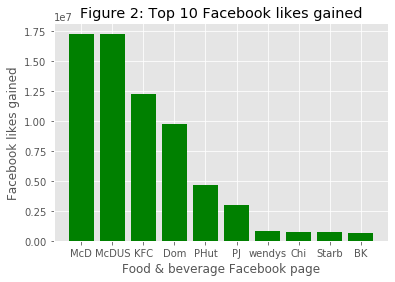

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

x = top10['FB name']
likes = top10['likes']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, likes, color='green')
plt.xlabel("Food & beverage Facebook page")
plt.ylabel("Facebook likes gained")
plt.title("Figure 2: Top 10 Facebook likes gained")

plt.xticks(x_pos, x)

plt.show()

Note: Dom=Dominos, PHut=Pizza Hut, PJ=PapaJohnUS, Chi=Chipotle, Stab=Starbucks, BK=Burger King

The absolute **likes** gain does not take into account the existing size of the page as well as the time taken to gain the likes. In order to get a more comparable data, the **likes values are normalised** and then **divided by the time frame** taken to gain those number of likes.    

In [116]:
diff_likes_norm=(Group_likes[['Normalised likes']].first()-Group_likes[['Normalised likes']].last())

In [117]:
diff_time_norm=(Group_likes[['time']].first()-Group_likes[['time']].last()).astype('timedelta64[D]')

In [118]:
x=diff_likes_norm/diff_time_norm.values

In [119]:
top10_norm=x.sort_values(by='Normalised likes',ascending=False)[0:10]


In [120]:
pagename_norm1=[]
for i in (top10_norm.index):
    pagename_norm1.append((Group_likes.get_group(i)['username'].head(1)).values[0])

In [121]:
pagename_norm=['McD',
 'McDUS',
 'KFC',
 'Dom',
 'PHut',
 'PJ',
 'Starb',
 'Wen',
 'Chi',
 'BK']

In [122]:
top10_norm.insert(0,'FB name',pagename_norm)


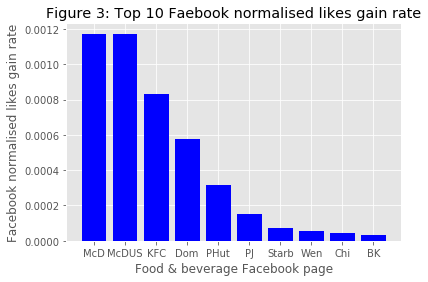

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

x = top10_norm['FB name']
likes = top10_norm['Normalised likes']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, likes, color='blue')
plt.xlabel("Food & beverage Facebook page")
plt.ylabel("Facebook normalised likes gain rate")
plt.title("Figure 3: Top 10 Faebook normalised likes gain rate")

plt.xticks(x_pos, x)

plt.show()

Note: Dom=Dominos, PHut=Pizza Hut, PJ=PapaJohnUS, Starb=Starbucks, Wen=Wendys, Chi=Chipotle,  BK=Burger King

In [124]:
top10_norm

,FB name,Normalised likes
facebook_id,,
10150097174480584,McD,0.001173
50245567013,McDUS,0.001172
7144906559,KFC,0.000833
6657899956,Dom,0.000578
321935321302049,PHut,0.000317
34703237638,PJ,0.000152
22092443056,Starb,0.000073
113385204488,Wen,0.000054
124149619252,Chi,0.000046


Analysing Figure 2 and 3, **ALL** Facebook pages in top 10 absolute likes gain also made to the top 10 normalised likes rate. 

The only different between these two figures is the **order** of the Facebook pages **Wendys, Chipotle and Strabucks**. In **Figure 2** (absolute likes gain) the order from 7-9 are as follows **Wendys, Chipotle then Strabucks**. While in **Figure 3** (normalised likes rate) the order from 7-9 are as follows **Strabucks, Wendys then Chipotle**.

Based on these observation, it can be concluded that **Strabucks** is likely to **overtake Wendys then Chipotle** in absolute gain chart(Figure 2) in the near future.
 

Next, the top 5 normalised likes rate Facebook pages are plotted against the time scale. Note that, the lastest date of the month and the total like at that time are used to develop the graph.

In [127]:
year=pd.DatetimeIndex(df2['time']).year
month=pd.DatetimeIndex(df2['time']).month
df3=df2
df3.loc[:,('time')]=df3['time'].dt.tz_localize(None)



In [128]:
df3.loc[:,('year')]=year
df3.loc[:,('month')]=month
Group_plot=(df3.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [129]:
page_rate=top10_norm.index[0:5]

In [246]:
all_time=[]
all_likes=[]
all_checkins=[]
for i in page_rate:
    xr=Group_plot.get_group(i).groupby(['year','month'])
    all_time.append(xr.head(1)['time'])
    all_likes.append(xr.head(1)['likes'])
    all_checkins.append(xr.head(1)['checkins'])


In [131]:
x=all_time
min_date=[]
max_date=[]
for i in range(5):
    min_date.append(min(x[i]))
    max_date.append(max(x[i]))
    
Min_final=min(min_date)
Max_final=max(max_date)


In [132]:
pagename_norm1

['McDonalds',
 'McDonaldsUS',
 'KFC',
 'Dominos',
 'PizzaHut',
 'papajohnsus',
 'Starbucks',
 'wendys',
 'chipotle',
 'burgerking']

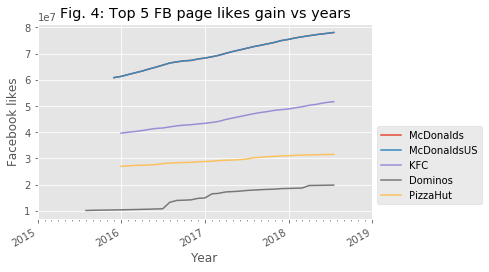

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
for i in range(len(all_time)):
    ax.plot(all_time[i],all_likes[i],label=pagename_norm1[i])


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.legend( bbox_to_anchor=(1, 0.5))
# round to nearest years.
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
plt.xlabel("Year")
plt.ylabel("Facebook likes")
plt.title("Fig. 4: Top 5 FB page likes gain vs years") 
ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

Note: McDonalds and McDonaldsUS have almost identical growth and FB likes which made their graphs to overlap. 

From Figure 4, it can be seen that the Facebook page **McDUS** (purple) and **McD** (red is overlapped) have the **steepest curve**, followed by **KFC** (light blue), **Dominos** (green), and then **PizzaHut** (yellow).

## 3.0 Examination of relationship between Facebook likes and Facebook talking about count

Next the top 5 Facebook pages that showed the most likes gained overtime are examined against the talking about count value. The aim here is to find whether there is a corelation between number or likes gained each month vs the talking about count. The number of likes gained each month determined by subtracting the newer month against the latest month likes count. While the average value of each month is used for talking about count value. Using these two values the corellation value is determined.

In [136]:
fnb_all_time=[]
fnb_all_likes=[]
for i in fnb_id:
    xr=Group_plot.get_group(i).groupby(['year','month'])
    fnb_all_time.append(xr.head(1)['time'])
    fnb_all_likes.append(xr.head(1)['likes'])

In [213]:
fnb_all_thumb=[]
fnb_all_talk=[]
fnb_all_corrcoef=[]
for i in range(len(fnb_id)):
    fnb_likes_gain=[]
    for j in range(len(fnb_all_likes[i])-1):
        fnb_likes_gain.append(fnb_all_likes[i].values[j]-fnb_all_likes[i].values[j+1])
    talk=(Group_plot.get_group(fnb_id[i]).groupby(['year','month'])['talking_about_count'].agg('mean')).values[::-1]
    talk=talk[0:-1]
    fnb_all_thumb.append(fnb_likes_gain)
    fnb_all_talk.append(talk)
    arr = np.array(fnb_likes_gain) 
    fnb_all_corrcoef.append(np.corrcoef(talk,arr)[0][1])


In [214]:
d = {'FB name':pd.Series(fnb),'facebook_id':pd.Series(fnb_id),'Correlation':pd.Series(fnb_all_corrcoef)}

In [215]:
fnb_coef=pd.DataFrame(d)
fnb_coef.set_index('facebook_id').sort_values(by='Correlation',ascending=False)[0:10]

,FB name,Correlation
facebook_id,,
80922110589,Maggianos,0.869549
233921809956670,PolloTropical,0.867789
56090499562,fuddruckers,0.861672
86744073413,seasons52,0.856273
80555139083,flemings,0.853067
94797847988,longhornsteakhouse,0.843345
69846573925,Lubys,0.840993
47575451523,bonefishgrill,0.810039
145230931776,hooters,0.797849


In [217]:
fnb_coef['Correlation'].abs().agg(['median','mean','std'])

median    0.556221
mean      0.535116
std       0.255601
Name: Correlation, dtype: float64

In [274]:
all_thumb=[]
all_talk=[]
all_corrcoef=[]
for i in range(len(top10_norm[0:5])):
    likes_gain=[]
    for j in range(len(all_likes[i])-1):
        likes_gain.append(all_likes[i].values[j]-all_likes[i].values[j+1])
    talk=(Group_plot.get_group(top10_norm.index[i]).groupby(['year','month'])['talking_about_count'].agg('mean')).values[::-1]
    talk=talk[0:-1]
    all_thumb.append(likes_gain)
    all_talk.append(talk)
    arr = np.array(likes_gain) 
    all_corrcoef.append(np.corrcoef(talk,arr)[0][1])


In [535]:
Coerf=top10_norm[0:5]
Coerf=Coerf.drop(['Normalised likes'],axis=1)
se = pd.Series(all_corrcoef)
Coerf['Correlation']=se.values
Coerf

,FB name,Correlation
facebook_id,,
10150097174480584,McD,0.536754
50245567013,McDUS,0.107279
7144906559,KFC,-0.318145
6657899956,Dom,0.304336
321935321302049,PHut,0.487411


McD has the higest correlation between likes and talking about count among the top 5 normalised likes growth Facebook pages. While, KFC has a negative relationship between likes and talking about count, a strange observation that requires further investigation.

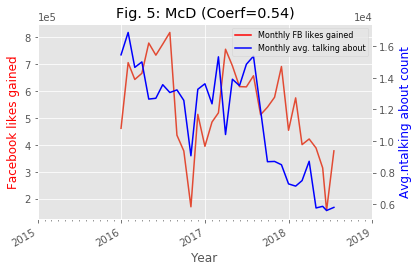

In [280]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

ax.plot(all_time[0].values[0:-1],all_thumb[0],label='monthly likes gained')
ax2=ax.twinx()
ax2.plot(all_time[0].values[0:-1],all_talk[0],"b-",label='average talking about count')


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
lines=[ax,ax2]
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

red_line = mlines.Line2D([], [],color='red', label='Monthly FB likes gained')
blue_line = mlines.Line2D([], [],color='blue', label='Monthly avg. talking about')
plt.legend(handles=[red_line,blue_line],loc='upper right',fontsize=8)


# round to nearest years.
Min_final=min(all_time[0].values[0:-1])
Max_final=max(all_time[0].values[0:-1])
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


ax.set_xlabel("Year")
ax2.set_ylabel("Avg.ntalking about count",color="blue",fontsize=12)
ax.set_ylabel("Facebook likes gained",color="red",fontsize=12)

plt.title("Fig. 5: McD (Coerf=0.54)") 
ax.grid(True)
ax2.grid(False)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

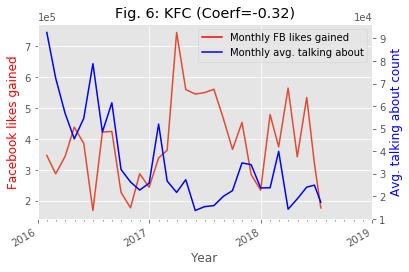

In [277]:
import matplotlib.lines as mlines
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')



fig, ax = plt.subplots()

ax.plot(all_time[2].values[0:-1],all_thumb[2],label='monthly likes gained')
ax2=ax.twinx()
ax2.plot(all_time[2].values[0:-1],all_talk[2],"b-",label='average talking about count')



# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
lines=[ax,ax2]
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))



red_line = mlines.Line2D([], [],color='red', label='Monthly FB likes gained')
blue_line = mlines.Line2D([], [],color='blue', label='Monthly avg. talking about')
plt.legend(handles=[red_line,blue_line],fontsize=10)




# round to nearest years.
Min_final=min(all_time[2].values[0:-1])
Max_final=max(all_time[2].values[0:-1])
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.set_xlabel("Year")
ax2.set_ylabel("Avg. talking about count",color="blue",fontsize=12)
ax.set_ylabel("Facebook likes gained",color="red",fontsize=12)

plt.title("Fig. 6: KFC (Coerf=-0.32)") 
ax.grid(True)
ax2.grid(False)




# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [190]:
fnb_checkins_thumb=[]
fnb_checkins_talk=[]
fnb_checkins_corrcoef=[]
for i in range(len(fnb_id)):
    
    talk=(Group_plot.get_group(fnb_id[i]).groupby(['year','month'])['checkins'].agg('mean')).values[::-1]
 
    arr = (Group_plot.get_group(fnb_id[i]).groupby(['year','month'])['likes'].head(1))
    fnb_checkins_corrcoef.append(np.corrcoef(talk,arr)[0][1])


In [192]:
d2 = {'FB name':pd.Series(fnb),'facebook_id':pd.Series(fnb_id),'Correlation':pd.Series(fnb_checkins_corrcoef)}

In [226]:
fnb_checkins_coef=pd.DataFrame(d2)
fnb_checkins_coef=fnb_checkins_coef.set_index('facebook_id').sort_values(by='Correlation',ascending=False)
fnb_checkins_coef

,FB name,Correlation
facebook_id,,
256154354583303,jet,0.993227
124653650181,shakeshack,0.979467
113385204488,wendys,0.969500
71011774235,ZoesKitchen,0.959700
46895347303,jackinthebox,0.950369
284314854066,papamurphyspizza,0.940280
175123745870734,crackerbarrel,0.931204
321935321302049,PizzaHut,0.891103
233921809956670,PolloTropical,0.849197


In [201]:
Total_nan=fnb_checkins_coef['Correlation'].isna().sum()

In [203]:
1-Total_nan/49

0.5510204081632653

Check-ins data only available to 27 (55%) food and beverage Facebook pages

Top 5 Facebook pages with high correlation between likes and check-ins count 

In [223]:
fnb_checkins_coef.dropna()[0:5]

,FB name,Correlation
facebook_id,,
256154354583303,jet,0.993227
124653650181,shakeshack,0.979467
113385204488,wendys,0.969500
71011774235,ZoesKitchen,0.959700
46895347303,jackinthebox,0.950369


Bottom 5 for Facebook pages with high correlation between likes and check-ins count 

In [224]:
fnb_checkins_coef.dropna()[:-6:-1]

,FB name,Correlation
facebook_id,,
120283141419641,EddieVsPrimeSeafood,-0.995349
7144906559,KFC,-0.980643
84579814673,Wingstop,-0.945261
92873089221,YardHouse,-0.926269
124149619252,chipotle,-0.918027


In [211]:
fnb_checkins_coef.dropna()['Correlation'].abs().agg(['median','mean','std'])

median    0.874955
mean      0.787543
std       0.235058
Name: Correlation, dtype: float64

In [241]:
Top5_coerf_checkins=[]
for i in top10_norm[0:5].index:
    Top5_coerf_checkins.append(fnb_checkins_coef.loc[i]['Correlation'])

In [244]:
Coerf_checkins=top10_norm[0:5]
Coerf_checkins=Coerf_checkins.drop(['Normalised likes'],axis=1)
se = pd.Series(Top5_coerf_checkins)
Coerf_checkins['Correlation']=se.values
Coerf_checkins

,FB name,Correlation
facebook_id,,
10150097174480584,McD,NaN
50245567013,McDUS,0.833581
7144906559,KFC,-0.980643
6657899956,Dom,NaN
321935321302049,PHut,0.891103


In [706]:
len(fnb_likes_gain2)

32

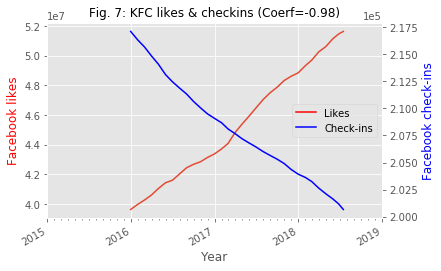

In [279]:
import matplotlib.lines as mlines
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')



fig, ax = plt.subplots()

ax.plot(all_time[2].values,all_likes[2])
ax2=ax.twinx()
ax2.plot(all_time[2].values,all_checkins[2],"b-")



# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
lines=[ax,ax2]
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))



red_line = mlines.Line2D([], [],color='red', label='Likes')
blue_line = mlines.Line2D([], [],color='blue', label='Check-ins')
plt.legend(handles=[red_line,blue_line],loc='center right',fontsize=10)




# round to nearest years.
Min_final=min(all_time[2].values)
Max_final=max(all_time[2].values)
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.set_xlabel("Year")
ax2.set_ylabel("Facebook check-ins",color="blue",fontsize=12)
ax.set_ylabel("Facebook likes",color="red",fontsize=12)

plt.title("Fig. 7: KFC likes & checkins (Coerf=-0.98)",fontsize=12) 
ax.grid(True)
ax2.grid(False)




# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

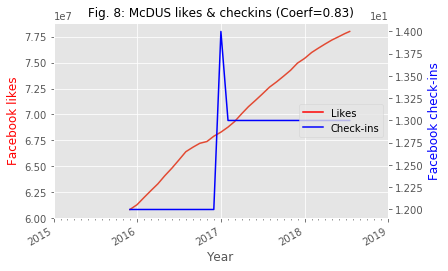

In [269]:
import matplotlib.lines as mlines
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')



fig, ax = plt.subplots()

ax.plot(all_time[1].values,all_likes[1])
ax2=ax.twinx()
ax2.plot(all_time[1].values,all_checkins[1],"b-")



# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
lines=[ax,ax2]
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))



red_line = mlines.Line2D([], [],color='red', label='Likes')
blue_line = mlines.Line2D([], [],color='blue', label='Check-ins')
plt.legend(handles=[red_line,blue_line],loc='center right',fontsize=10)




# round to nearest years.
Min_final=min(all_time[1].values)
Max_final=max(all_time[1].values)
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.set_xlabel("Year")
ax2.set_ylabel("Facebook check-ins",color="blue",fontsize=12)
ax.set_ylabel("Facebook likes",color="red",fontsize=12)

plt.title("Fig. 8: McDUS likes & checkins (Coerf=0.83)",fontsize=12) 
ax.grid(True)
ax2.grid(False)




# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()